In [1]:
#PyTorch Computer Vision
import torch 
from torch import nn
import pandas as pd


#Import torchvision
import torchvision
from torchvision import datasets

from torchvision import transforms
from torchvision.transforms import ToTensor

In [2]:
#Import matplotlib for visualisation
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.7.1
0.22.1


## 1.Getting a dataset

Dataset - FashionMNIST


In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train= True,
    download= True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

In [4]:
test_data= datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [5]:
len(train_data),len(test_data)

(60000, 10000)

In [6]:
#See the first training example
image,label=train_data[0]
label

9

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx= train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
print(f"Image Shape: {image.shape} -> [color_channels,height,width,label")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels,height,width,label


Text(0.5, 1.0, '9')

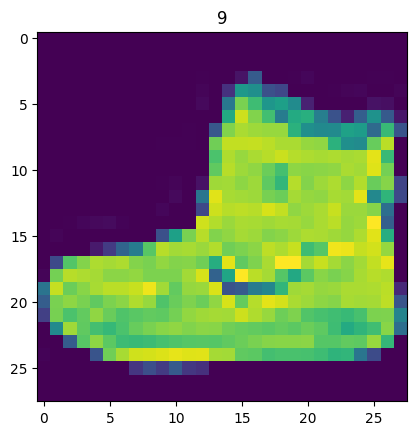

In [11]:
plt.imshow(image.squeeze())
plt.title(label)

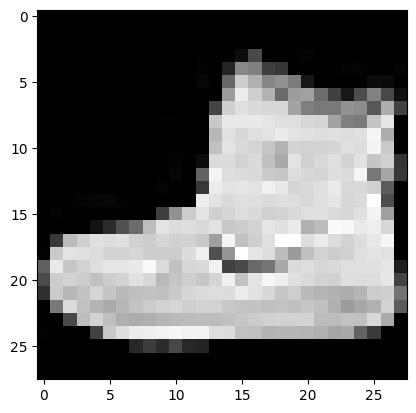

In [12]:
plt.imshow(image.squeeze(),cmap="gray")

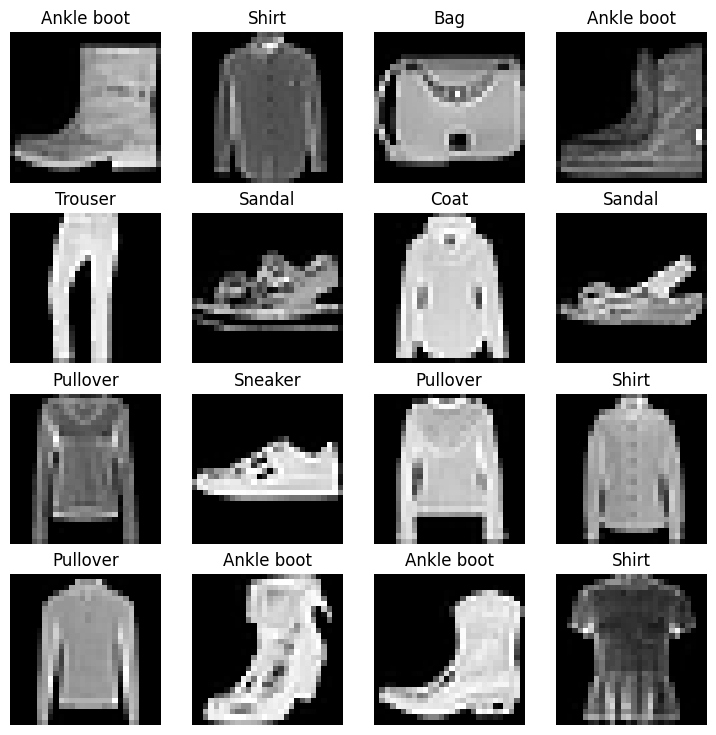

In [13]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1, rows*cols+1):
    random_idx= torch.randint(0,len(train_data),size=[1]).item()
    img,label= train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [14]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [15]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

### DataLoader turns dataset into a Python iterable 

In [16]:
from torch.utils.data import DataLoader
BATCH_SIZE= 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


In [17]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x12eaca510>,
 <torch.utils.data.dataloader.DataLoader at 0x12f1b02d0>)

In [18]:
print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length:{len(train_dataloader),len(test_dataloader)}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x12eaca510>, <torch.utils.data.dataloader.DataLoader object at 0x12f1b02d0>)
Length:(1875, 313)


In [19]:
#torch.manual_seed(15)
#Check out whats inside training dataloader
train_features_batch,train_labels_batch= next(iter(train_dataloader))

In [20]:
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [21]:
random_idx= torch.randint(0,len(train_features_batch),size=[1]).item()

In [22]:
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]

Image size: torch.Size([1, 28, 28])
Label8,label size: torch.Size([])


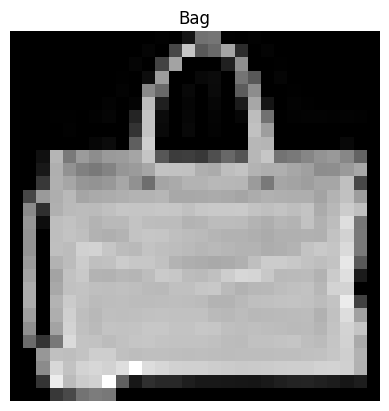

In [23]:
plt.imshow(img.squeeze(),cmap="grey")
plt.axis(False)
plt.title(class_names[label])
print(f"Image size: {img.shape}")
print(f"Label{label},label size: {label.shape}")

# Model 0
its a baseline model that we will try and improve upon

start simply and add complexity when necessary

In [24]:
#Creating a flatten layer

flatten_model= nn.Flatten()
#Get a single sample
x=train_features_batch[0]
x.shape

# Flatten the sample
output= flatten_model(x) #perform forward pass

#Print out what happened
print(f"Shape before flattening : {x.shape}")
print(f"Shape after flattening : {output.shape}")

Shape before flattening : torch.Size([1, 28, 28])
Shape after flattening : torch.Size([1, 784])


In [25]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape,
                      out_features= hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features = output_shape)
        )
    def forward(self,x):
        return self.layer_stack(x)
        

In [26]:
torch.manual_seed(42)

In [27]:
model_0=FashionMNISTModelV0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape =len(class_names)
)
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [28]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [29]:
dummy_x=torch.rand([1,1,28,28])

In [30]:
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [31]:
model_0.state_dict

<bound method Module.state_dict of FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)>

## Setup loss, optimizer and evaluation metrics


In [32]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc= (correct/ len(y_pred))*100
    return acc
model_0.parameters

<bound method Module.parameters of FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)>

In [33]:
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_0.parameters(),
                           lr=0.1)


In [34]:
accuracy_fn


<function __main__.accuracy_fn(y_true, y_pred)>

In [35]:
from timeit import default_timer as timer
def print_train_time (start:float,
                      end: float,
                      device: torch.device=None):
    """Prints difference between start and end time"""
    total_time = end-start
    print(f"Train time on {device} : { total_time: .3f} seconds")
    return total_time

In [36]:
start_time= timer()





end_time = timer()
print_train_time(start = start_time,
                 end = end_time,
                 device = "cpu")

Train time on cpu :  0.000 seconds


8.66700429469347e-06

1. Loop through epochs.
2. Loop through training batches,perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testings steps, calaculate the test loss per batch
4. Print out whats happening
5. Time it all

# Creating a training loop

In [37]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu= timer()

#Set the number of epochs
epochs= 3
# CREATING TRAINING AND TEST LOOP


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")

    train_loss=0
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()
        #Forward pass
        y_pred = model_0(X)
        #Calculate loss
        loss= loss_fn(y_pred,y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
    #Divide total train loss by length og train dataloader
    train_loss/= len(train_dataloader)   
    #Testing
    test_loss,test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            #1.Forward pass
            test_pred= model_0(X)
            test_loss += loss_fn(test_pred,y)

            test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
        test_loss/=len(test_dataloader)
        test_acc /=len(test_dataloader)

    print(f"\nTrainLoss: {train_loss:.4f} | Test loss: {test_loss: .4f}, Test acc: {test_acc:.4f} ")
train_time_end_on_cpu= timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

TrainLoss: 0.5904 | Test loss:  0.5095, Test acc: 82.0387 
Epoch: 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

TrainLoss: 0.4763 | Test loss:  0.4799, Test acc: 83.1969 
Epoch: 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

TrainLoss: 0.4550 | Test loss:  0.4766, Test acc: 83.4265 
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.000

In [38]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    
    loss, acc = 0.0, 0.0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)
            # Accumulate loss and accuracy as Python floats
            loss += loss_fn(y_pred, y).item()
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            
    loss /= len(data_loader)
    acc /= len(data_loader)
    
    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss,
        "model_acc": acc
    }


In [39]:
model_0_results = eval_model(model=model_0,
                             data_loader =test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663889215967525,
 'model_acc': 83.42651757188499}

## SETUP DEVICE AGNOSTIC CODE

In [40]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units:int,
                 output_shape: int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )
    def forward(self,x: torch.Tensor):
        return self.layer_stack(x)
                    

In [42]:
torch.manual_seed(42)
device= "cpu"
model_1= FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [43]:
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)


## Functionizing training and evaluation/testing loops

In [44]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device= "cpu"):
    train_loss,train_acc=0,0
    model.train()

    for batch,(X,y) in enumerate(data_loader):
        X,y= X.to(device), y.to(device)

        y_pred=model(X)

        loss= loss_fn(y_pred,y)
        train_loss+= loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

    train_loss /=len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f} %\n")
    

In [45]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: "cpu"):
    test_loss,test_acc=0,0

    model.eval()

    with torch.inference_mode():
        for X,y in data_loader:
            #Send the data to target device
            X,y = X.to(device),y.to(device)

            test_pred = model(X)

            test_loss+=loss_fn(test_pred,y)
            test_acc+=accuracy_fn(y_true=y,
                                  y_pred=test_pred.argmax(dim=1))

        test_loss /=len(data_loader)
        test_acc /=len(data_loader)

        print(f"test loss: {test_loss:.5f} | test acc: {test_acc:.2f} %\n")
        

In [46]:
epochs=3

In [47]:
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model = model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              device=device,
              accuracy_fn=accuracy_fn)
            

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 1.05878 | Train acc: 62.19 %

test loss: 0.99506 | test acc: 64.13 %

Epoch: 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.91331 | Train acc: 66.40 %

test loss: 0.90508 | test acc: 66.86 %

Epoch: 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.87981 | Train acc: 67.25 %

test loss: 0.89485 | test acc: 66.47 %



In [48]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [49]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8948531761146582,
 'model_acc': 66.47364217252397}

In [50]:
# Create a CNN

In [51]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website
    """
    def __init__(self,input_shape: int,hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), #values we can set ourselves in our NN's are
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self,x):
        x = self.conv_block_1(x)
        
        x=self.conv_block_2(x)
        
        x=self.classifier(x)
        return x
         
                    
                

In [52]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
                        

In [53]:
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

In [54]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               optimizer=optimizer,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2=timer()
total_train_time_model_2= print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)
                                           
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.59408 | Train acc: 78.47 %

test loss: 0.39696 | test acc: 86.12 %

Epoch: 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.36380 | Train acc: 86.85 %

test loss: 0.35904 | test acc: 87.11 %

Epoch: 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.32568 | Train acc: 88.25 %

test loss: 0.31981 | test acc: 88.37 %

Train time on cpu :  49.166 seconds


In [55]:
model_2_results= eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31981073810269656,
 'model_acc': 88.36861022364218}

In [56]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663889215967525,
 'model_acc': 83.42651757188499}

In [57]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8948531761146582,
 'model_acc': 66.47364217252397}

In [58]:
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample,dim=0).to(device)
            pred_logit = model(sample)

            #Pred probs
            pred_prob =torch.softmax(pred_logit.squeeze(),dim=0)
            pred_probs.append(pred_prob)
            
    return torch.stack(pred_probs)   
        

In [59]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)




Text(0.5, 1.0, 'Sandal')

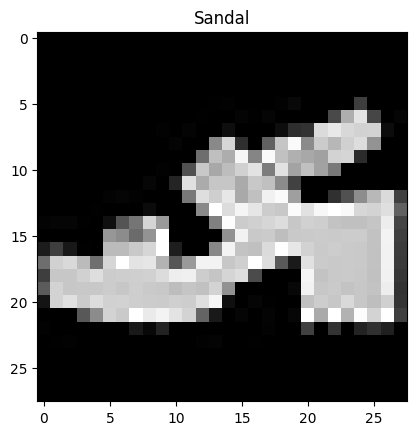

In [60]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [61]:
pred_probs=make_predictions(model=model_2,
                            data=test_samples)
#View the first two pred probs

pred_probs[:2]

tensor([[2.2111e-08, 1.7612e-09, 2.3541e-09, 3.1420e-09, 4.7164e-09, 9.9999e-01,
         1.6477e-08, 7.3189e-07, 2.6290e-06, 1.0599e-05],
        [6.3690e-02, 3.1050e-01, 1.4760e-04, 2.8490e-02, 4.5237e-01, 1.3652e-05,
         1.4452e-01, 1.7567e-04, 4.6917e-05, 4.6501e-05]])

In [62]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [63]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([5, 4, 7, 4, 3, 0, 4, 7, 1])

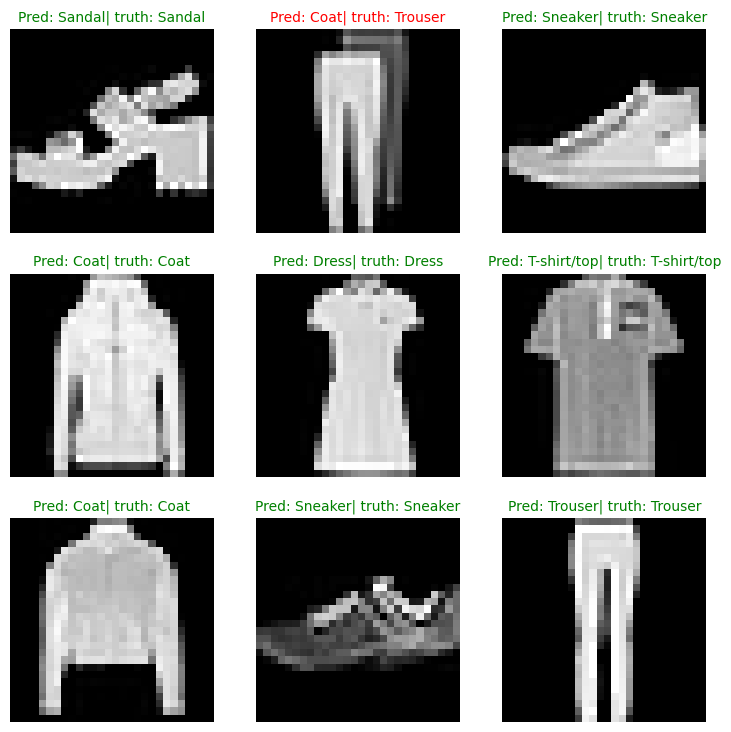

In [64]:
plt.figure(figsize=(9,9))

nrows=3
ncols=3
for i, sample in enumerate (test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")
    #Find the prediction label(in text form, e.g. "Sandal")
    pred_label=class_names[pred_classes[i]]

    #truth label
    truth_label = class_names[test_labels[i]]
    title_text=f"Pred: {pred_label}| truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text,fontsize=10,c="g")
    else:
        plt.title(title_text,fontsize=10,c="r")
    plt.axis(False);


        




# Making a confusion matrix
its a way of evaluating classification models visually

In [66]:
import mlxtend


In [67]:
mlxtend.__version__

'0.23.4'

In [71]:
from tqdm.auto import tqdm
y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc ="Making predictions..."):
        X,y=X.to(device),y.to(device)

        y_logit=model_2(X)
        #Turn prediction
        y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())


y_pred_tensor= torch.cat(y_preds)
y_pred_tensor
    


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [72]:
len(y_pred_tensor)

10000